In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix

In [2]:
df = pd.read_csv("data/HR_comma_sep.csv")

# Data Semantics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Distributions of the Variables and Statistics

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14941,0.43,0.49,2,131,3,0,1,0,RandD,high
392,0.84,1.00,4,261,5,0,1,0,sales,low
5427,0.68,0.71,5,135,4,1,0,0,marketing,medium
5660,0.75,0.52,3,260,3,1,0,0,sales,low
2189,0.92,0.91,4,222,2,0,0,0,support,low


In [7]:
# print unique values of features
for col in df:
    print col , " unique values: " , df[col].unique()

satisfaction_level  unique values:  [ 0.38  0.8   0.11  0.72  0.37  0.41  0.1   0.92  0.89  0.42  0.45  0.84
  0.36  0.78  0.76  0.09  0.46  0.4   0.82  0.87  0.57  0.43  0.13  0.44
  0.39  0.85  0.81  0.9   0.74  0.79  0.17  0.24  0.91  0.71  0.86  0.14
  0.75  0.7   0.31  0.73  0.83  0.32  0.54  0.27  0.77  0.88  0.48  0.19
  0.6   0.12  0.61  0.33  0.56  0.47  0.28  0.55  0.53  0.59  0.66  0.25
  0.34  0.58  0.51  0.35  0.64  0.5   0.23  0.15  0.49  0.3   0.63  0.21
  0.62  0.29  0.2   0.16  0.65  0.68  0.67  0.22  0.26  0.99  0.98  1.
  0.52  0.93  0.97  0.69  0.94  0.96  0.18  0.95]
last_evaluation  unique values:  [ 0.53  0.86  0.88  0.87  0.52  0.5   0.77  0.85  1.    0.54  0.81  0.92
  0.55  0.56  0.47  0.99  0.51  0.89  0.83  0.95  0.57  0.49  0.46  0.62
  0.94  0.48  0.8   0.74  0.7   0.78  0.91  0.93  0.98  0.97  0.79  0.59
  0.84  0.45  0.96  0.68  0.82  0.9   0.71  0.6   0.65  0.58  0.72  0.67
  0.75  0.73  0.63  0.61  0.76  0.66  0.69  0.37  0.64  0.39  0.41  0.43
  0.44 

In [8]:
# divide the features in numerical and categorical
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
categorical_features = ['Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]

In [9]:
numerical_df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
13643,0.91,0.82,4,238,2
7625,0.35,0.40,3,130,3
11915,0.94,0.99,2,157,3
7236,0.58,0.61,2,191,3
12045,0.84,0.74,3,182,4


In [10]:
categorical_df.sample(5)

,Work_accident,left,promotion_last_5years,sales,salary
13269,0,0,0,support,high
5289,0,0,0,sales,medium
10505,0,0,0,support,medium
1753,0,1,0,RandD,medium
6299,0,0,0,technical,medium


### Bar charts

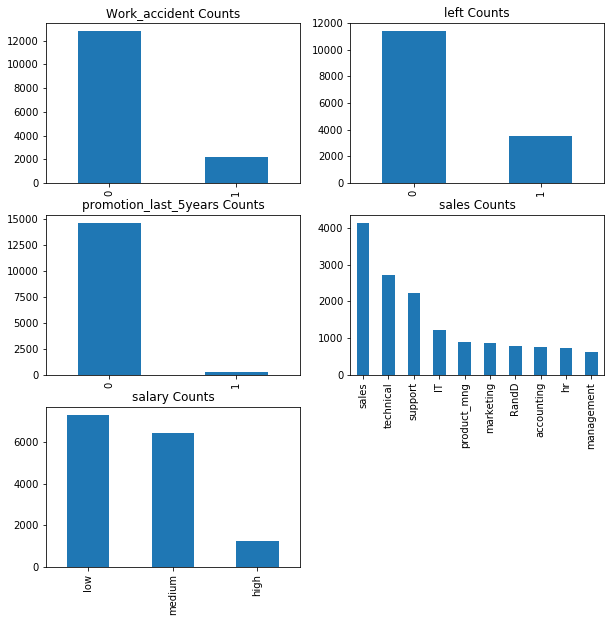

In [11]:
# plot histograms for numerical features and bar charts for categorical features

# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

positions = itertools.product(range(3), range(2))

# plot bar charts
for col, pos in zip(categorical_df, positions) :
    plt.subplot2grid(fig_dims, pos)
    categorical_df[col].value_counts().plot(kind='bar', title= col + ' Counts')
    #plt.xticks(rotation=0) 

plt.savefig('images/categorical_features_distributions.png')
plt.show()

# TODO promotion_last_5years feature could be removed since most of the samples have values 0 and very few have  value 1
# 1) compute distribution 2) remove samples that have value 1 3) remove feature

### Histograms

/home/carlo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/carlo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


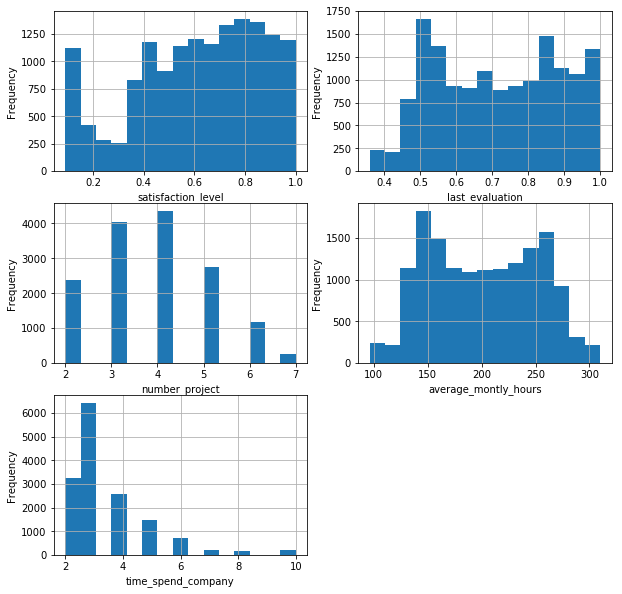

In [12]:
fig = plt.figure(figsize=(10, 10)) 
positions = itertools.product(range(3), range(2))

# plot histograms -- Sturge's rule for the number of bins
for col, pos in zip(numerical_df, positions):
    plt.subplot2grid(fig_dims, pos)
    numerical_df[col].hist(bins=(np.ceil(np.log2(len(numerical_df[col])) + 1)))
    plt.ylabel('Frequency')
    plt.xlabel(col)
plt.savefig('images/quantitative_features_distributions.png')
plt.show()

### transform categorical features to numerical features

In [13]:
sales_unique = sorted(df['sales'].unique())
salary_unique = sorted(df['salary'].unique())
sales_mapping = dict(zip(sales_unique, range(0, len(sales_unique) + 1)))
salary_mapping = dict(zip(salary_unique, range(0, len(salary_unique) + 1)))
df['sales'].replace(sales_mapping, inplace=True)
df['salary'].replace(salary_mapping, inplace=True)
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
10271,0.79,0.57,4,152,3,0,0,0,9,1
6988,0.61,0.97,4,256,4,0,0,0,9,2
6796,0.56,0.76,4,206,2,1,0,0,8,1
1641,0.41,0.56,2,154,3,0,1,0,9,1
6755,0.99,0.92,3,154,3,0,0,0,9,2


In [14]:
# scale features between 0 and 1
scaler = MinMaxScaler()
df_01_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_01_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.777778,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.777778,0.5
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.777778,0.5


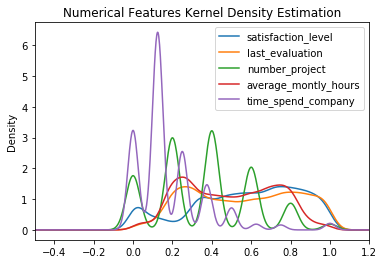

In [15]:
# distributions of numerical features
for col in numerical_df:
    df_01_scaled[col].plot(kind='kde')
plt.title('Numerical Features Kernel Density Estimation')
plt.xlim([-0.5,1.2])
plt.legend(numerical_df.columns, loc='best')
plt.savefig('images/kde_quantitative_features.png')

# Assessing data quality - Outlier detection

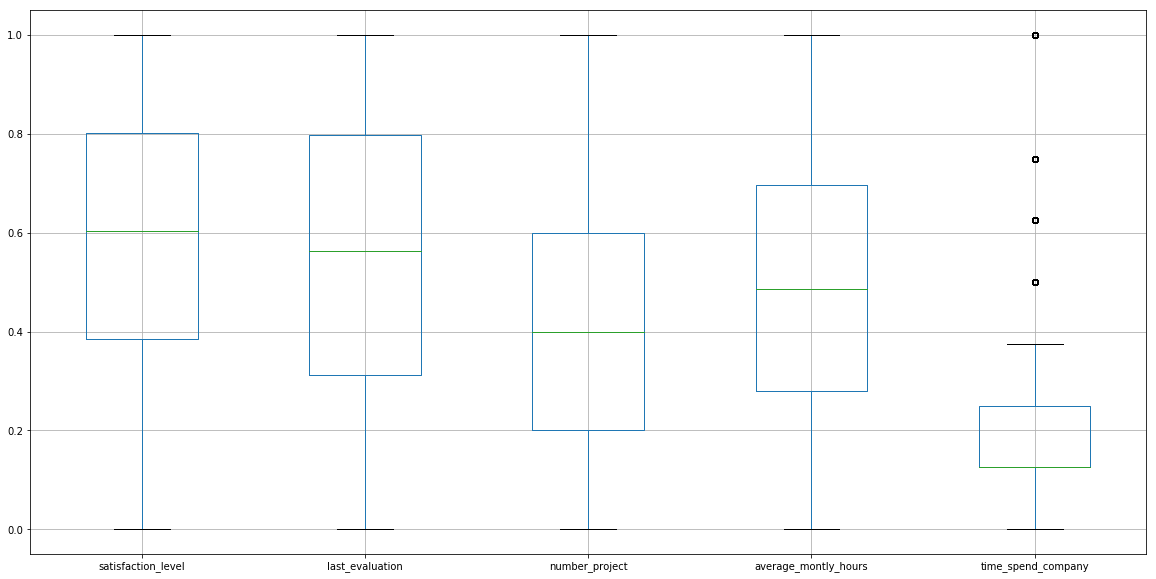

In [16]:
# box plots
# dictionary key = boxes, medians, whiskers, caps, fliers 
#box_plot_dict = plt.boxplot([row for row in X_scaled], labels=[df.columns])
#df_01_scaled.boxplot(figsize=(50,10))

# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create the boxplot
df_01_scaled[numerical_features].boxplot()

# Save the figure
fig.savefig('images/boxplot_numerical_features.png', bbox_inches='tight')

In [17]:
# outliers in time_spend_companies correspond to the values with the less frequency in the histogram.
# box plots for 0-1 features are not particularly interesting.

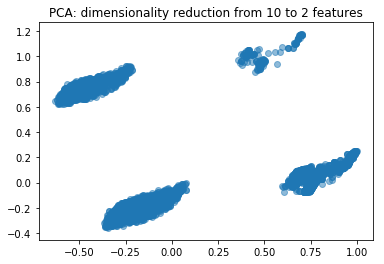

In [18]:
# Principal Component Analysis to plot the data in 2D. (dimensionality reduction from 10 to 2)
pca = PCA(n_components=2)
X_scaled_2D = pca.fit_transform(df_01_scaled)
plt.scatter(X_scaled_2D[:,0], X_scaled_2D[:,1], alpha=0.5)
plt.title("PCA: dimensionality reduction from 10 to 2 features")
plt.show()

In [19]:
# data doesn't look so sparse so don't use logarithmic transformation.

# Pairwise correlation and eventual elimination of redundant variables

In [20]:
# pearsons' r pairwise
df_01_scaled.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


In [21]:
# spearmans pairwise
df_01_scaled.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306,0.002490,0.018837
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167,0.013711,0.011958
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960,0.017596,0.008727
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951,0.007833,0.006140
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205,-0.016570,0.009128
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245,0.001863,-0.001111
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788,0.033180,-0.023751
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000,-0.043517,0.012702
sales,0.002490,0.013711,0.017596,0.007833,-0.016570,0.001863,0.033180,-0.043517,1.000000,-0.000734
salary,0.018837,0.011958,0.008727,0.006140,0.009128,-0.001111,-0.023751,0.012702,-0.000734,1.000000


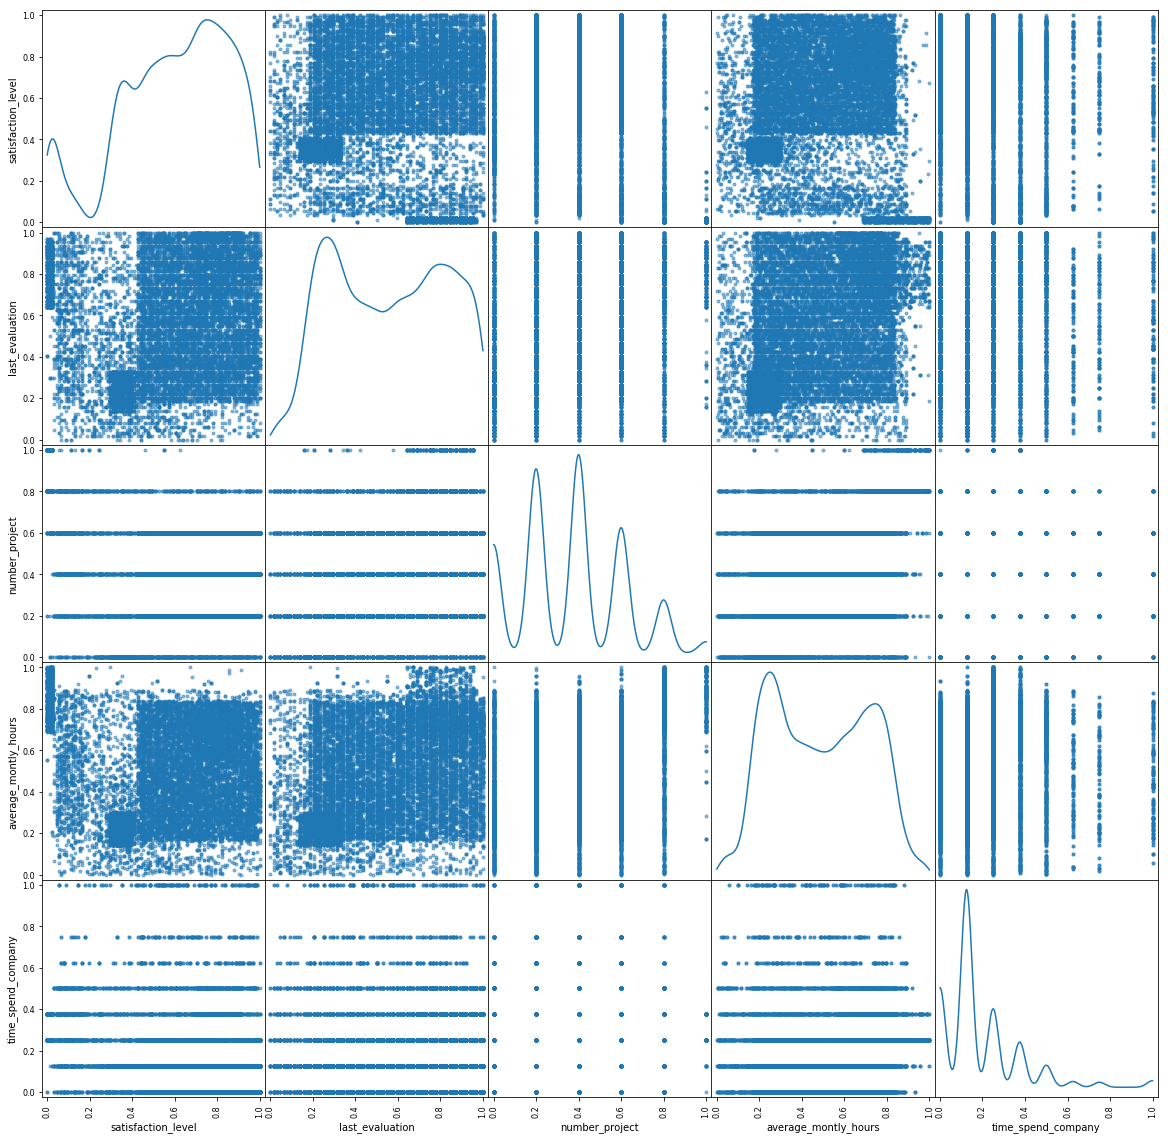

In [23]:
# scatter matrix
scatter_matrix(frame=df_01_scaled[numerical_features], figsize=(20,20), diagonal='kde')
plt.savefig('images/scatter_matrix_numerical_features.png')
plt.show()

In [ ]:
# dump dataset
df_01_scaled.to_csv('data/HR_comma_sep_01_scaled.csv')